In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
import pandas as pd
import numpy as np 
from sklearn import metrics
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
dataset = pd.read_excel('./dataharga.xlsx')
dataset.head()

Kabupaten  2018-01-01 00:00:00  2018-01-02 00:00:00  \
0       Kabupaten Cilacap                    0                16000   
1      Kabupaten Banyumas                    0                20000   
2   Kabupaten Purbalingga                    0                    0   
3  Kabupaten Banjarnegara                    0                20200   
4       Kabupaten Kebumen                    0                20000   

   2018-01-03 00:00:00  2018-01-04 00:00:00  2018-01-05 00:00:00  \
0                18000                18000                18000   
1                20000                20000                20000   
2                    0                    0                    0   
3                20200                20200                20200   
4                20000                20000                20000   

   2018-01-08 00:00:00  2018-01-09 00:00:00  2018-01-10 00:00:00  \
0                17000                17000                17000   
1                20000                20000                20000   
2                    0                    0                    0   
3                20800                21000                20750   
4                20000                    0                22500   

   2018-01-11 00:00:00  2018-01-12 00:00:00  2018-01-15 00:00:00  \
0                17000                17000                17000   
1                20000                20000                20000   
2                    0                    0                    0   
3                21000                21000                20000   
4                22500                    0                23000   

   2018-01-16 00:00:00  2018-01-17 00:00:00  2018-01-18 00:00:00  \
0                17000                    0                17000   
1                20000                19333                17833   
2                    0                    0                    0   
3                20600                20600                20600   
4                24000                23000                23000   

   2018-01-19 00:00:00  2018-01-22 00:00:00  2018-01-23 00:00:00  \
0                17000                17000                    0   
1                17833                17000                16333   
2                    0                    0                    0   
3                20666                    0                    0   
4                23000                23000                23000   

   2018-01-24 00:00:00  2018-01-25 00:00:00  2018-01-26 00:00:00  \
0                17000                17000                17000   
1                16333                16333                16333   
2                    0                    0                    0   
3                    0                    0                    0   
4                23000                23000                23000   

   2018-01-29 00:00:00  2018-01-30 00:00:00  2018-01-31 00:00:00  \
0                17000                17000                17000   
1                16333                16333                16333   
2                    0                    0                    0   
3                    0                    0                    0   
4                23000                23000                    0   

   2018-02-01 00:00:00  2018-02-02 00:00:00  2018-02-05 00:00:00  \
0                    0                17000                20000   
1                16333                16333                18000   
2                    0                    0                    0   
3                    0                    0                    0   
4                23000                    0                20000   

   2018-02-06 00:00:00  2018-02-07 00:00:00  2018-02-08 00:00:00  \
0                20000                20000                20000   
1                20666                20666                20666   
2                    0                    0                    0   
3                    0                    0  

## temuan
- dari record 1 sampai terakhir, ada beberapa tanggal, nilainya 0, ini berarti libur nasional --> replace 0 menjadi NaN.
- setelah menjadi NaN, maka hapus data berbasis kolom

In [ ]:
dataset.replace(to_replace = 0, value = pd.NA, inplace=True)
dataset

Kabupaten 2018-01-01 00:00:00 2018-01-02 00:00:00  \
0        Kabupaten Cilacap                <NA>               16000   
1       Kabupaten Banyumas                <NA>               20000   
2    Kabupaten Purbalingga                <NA>                <NA>   
3   Kabupaten Banjarnegara                <NA>               20200   
4        Kabupaten Kebumen                <NA>               20000   
5      Kabupaten Purworejo                <NA>                <NA>   
6       Kabupaten Wonosobo                <NA>               20000   
7       Kabupaten Magelang                <NA>                <NA>   
8       Kabupaten Boyolali                <NA>                <NA>   
9         Kabupaten Klaten                <NA>                <NA>   
10     Kabupaten Sukoharjo                <NA>               20000   
11      Kabupaten Wonogiri                <NA>               15000   
12   Kabupaten Karanganyar                <NA>                <NA>   
13        Kabupaten Sragen                <NA>               14666   
14      Kabupaten Grobogan                <NA>                <NA>   
15         Kabupaten Blora                <NA>                <NA>   
16       Kabupaten Rembang                <NA>                <NA>   
17          Kabupaten Pati                <NA>                <NA>   
18         Kabupaten Kudus                <NA>               15000   
19        Kabupaten Jepara                <NA>                <NA>   
20         Kabupaten Demak                <NA>               15000   
21      Kabupaten Semarang                <NA>                <NA>   
22    Kabupaten Temanggung                <NA>                <NA>   
23        Kabupaten Kendal                <NA>                <NA>   
24        Kabupaten Batang                <NA>                <NA>   
25    Kabupaten Pekalongan                <NA>                <NA>   
26      Kabupaten Pemalang                <NA>                <NA>   
27         Kabupaten Tegal                <NA>               16000   
28        Kabupaten Brebes               14000               13000   
29           Kota Magelang                <NA>               18000   
30          Kota Surakarta                <NA>               18500   
31           Kota Salatiga                <NA>               21000   
32           Kota Semarang               18400               18400   
33         Kota Pekalongan                <NA>               15000   
34              Kota Tegal                <NA>               16000   

   2018-01-03 00:00:00 2018-01-04 00:00:00 2018-01-05 00:00:00  \
0                18000               18000               18000   
1                20000               20000               20000   
2                 <NA>                <NA>                <NA>   
3                20200               20200               20200   
4                20000               20000               20000   
5                 <NA>                <NA>                <NA>   
6                20000               20000               20000   
7                 <NA>                <NA>                <NA>   
8                 <NA>                <NA>                <NA>   
9                 <NA>                <NA>                <NA>   
10               20000               20000               20000   
11               15000               15000                <NA>   
12                <NA>                <NA>                <NA>   
13               14666               14666               14666   
14                <NA>                <NA>                <NA>   
15                <NA>                <NA>                <NA>   
16                <NA>                <NA>                <NA>   
17               18000                <NA>               18000   
18               15000               15000               16500   
19               20000               20000               18666   
20               15000               15000               15000   
21                <NA>                <NA>  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 1241 entries, Kabupaten to 2022-09-30 00:00:00
dtypes: int64(1), object(1240)
memory usage: 339.5+ KB


In [ ]:
dataset_clean = dataset.dropna(axis=1, thresh=10) 

In [ ]:
dataset_clean = dataset.dropna(axis=0, thresh=10) 

In [ ]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Columns: 1241 entries, Kabupaten to 2022-09-30 00:00:00
dtypes: int64(1), object(1240)
memory usage: 339.6+ KB


In [ ]:
dataset_clean.head()

Kabupaten 2018-01-01 00:00:00 2018-01-02 00:00:00  \
0       Kabupaten Cilacap                <NA>               16000   
1      Kabupaten Banyumas                <NA>               20000   
2   Kabupaten Purbalingga                <NA>                <NA>   
3  Kabupaten Banjarnegara                <NA>               20200   
4       Kabupaten Kebumen                <NA>               20000   

  2018-01-03 00:00:00 2018-01-04 00:00:00 2018-01-05 00:00:00  \
0               18000               18000               18000   
1               20000               20000               20000   
2                <NA>                <NA>                <NA>   
3               20200               20200               20200   
4               20000               20000               20000   

  2018-01-08 00:00:00 2018-01-09 00:00:00 2018-01-10 00:00:00  \
0               17000               17000               17000   
1               20000               20000               20000   
2                <NA>                <NA>                <NA>   
3               20800               21000               20750   
4               20000                <NA>               22500   

  2018-01-11 00:00:00 2018-01-12 00:00:00 2018-01-15 00:00:00  \
0               17000               17000               17000   
1               20000               20000               20000   
2                <NA>                <NA>                <NA>   
3               21000               21000               20000   
4               22500                <NA>               23000   

  2018-01-16 00:00:00 2018-01-17 00:00:00 2018-01-18 00:00:00  \
0               17000                <NA>               17000   
1               20000               19333               17833   
2                <NA>                <NA>                <NA>   
3               20600               20600               20600   
4               24000               23000               23000   

  2018-01-19 00:00:00 2018-01-22 00:00:00 2018-01-23 00:00:00  \
0               17000               17000                <NA>   
1               17833               17000               16333   
2                <NA>                <NA>                <NA>   
3               20666                <NA>                <NA>   
4               23000               23000               23000   

  2018-01-24 00:00:00 2018-01-25 00:00:00 2018-01-26 00:00:00  \
0               17000               17000               17000   
1               16333               16333               16333   
2                <NA>                <NA>                <NA>   
3                <NA>                <NA>                <NA>   
4               23000               23000               23000   

  2018-01-29 00:00:00 2018-01-30 00:00:00 2018-01-31 00:00:00  \
0               17000               17000               17000   
1               16333               16333               16333   
2                <NA>                <NA>                <NA>   
3                <NA>                <NA>                <NA>   
4               23000               23000                <NA>   

  2018-02-01 00:00:00 2018-02-02 00:00:00 2018-02-05 00:00:00  \
0                <NA>               17000               20000   
1               16333               16333               18000   
2                <NA>                <NA>                <NA>   
3                <NA>                <NA>                <NA>   
4               23000                <NA>               20000   

  2018-02-06 00:00:00 2018-02-07 00:00:00 2018-02-08 00:00:00  \
0               20000               20000               20000   
1               20666               20666               20666   
2                <NA>                <NA>                <NA>   
3                <NA>                <NA>                <NA>   
4               20000               20000               20000   

  2018-02-09 00:00:00 2018-02-12 00:00:00 2018-02-13 00:00:00  \
0               2

In [ ]:
Tegal = dataset_clean.loc[dataset_clean['Kabupaten'] == 'Kabupaten Tegal'] 
Tegal.head()

Kabupaten 2018-01-02 00:00:00 2018-01-03 00:00:00  \
27  Kabupaten Tegal               16000               16000   

   2018-01-04 00:00:00 2018-01-05 00:00:00 2018-01-08 00:00:00  \
27               16000               16000               16000   

   2018-01-09 00:00:00 2018-01-10 00:00:00 2018-01-11 00:00:00  \
27               16000               15000               15000   

   2018-01-12 00:00:00 2018-01-15 00:00:00 2018-01-16 00:00:00  \
27               15000               15000               15000   

   2018-01-17 00:00:00 2018-01-18 00:00:00 2018-01-19 00:00:00  \
27               12000               12000               12000   

   2018-01-22 00:00:00 2018-01-23 00:00:00 2018-01-24 00:00:00  \
27               12000               12000               12000   

   2018-01-25 00:00:00 2018-01-26 00:00:00 2018-01-29 00:00:00  \
27               12000               12000                <NA>   

   2018-01-30 00:00:00 2018-01-31 00:00:00 2018-02-01 00:00:00  \
27                <NA>               12000               12000   

   2018-02-02 00:00:00 2018-02-05 00:00:00 2018-02-06 00:00:00  \
27               12000               16000               16000   

   2018-02-07 00:00:00 2018-02-08 00:00:00 2018-02-09 00:00:00  \
27               16000               16000               15000   

   2018-02-12 00:00:00 2018-02-13 00:00:00 2018-02-14 00:00:00  \
27               18000               18000               18000   

   2018-02-15 00:00:00 2018-02-19 00:00:00 2018-02-20 00:00:00  \
27               20000               20000               20000   

   2018-02-21 00:00:00 2018-02-22 00:00:00 2018-02-23 00:00:00  \
27               20000               20000               20000   

   2018-02-26 00:00:00 2018-02-27 00:00:00 2018-02-28 00:00:00  \
27               22000               22000               22000   

   2018-03-01 00:00:00 2018-03-02 00:00:00 2018-03-05 00:00:00  \
27               22000               22000               22000   

   2018-03-06 00:00:00 2018-03-07 00:00:00 2018-03-08 00:00:00  \
27               22000               22000               22000   

   2018-03-09 00:00:00 2018-03-12 00:00:00 2018-03-13 00:00:00  \
27               20000               20000               28000   

   2018-03-14 00:00:00 2018-03-15 00:00:00 2018-03-16 00:00:00  \
27               28000               24000               28000   

   2018-03-19 00:00:00 2018-03-20 00:00:00 2018-03-21 00:00:00  \
27               28000               24000                <NA>   

   2018-03-22 00:00:00 2018-03-23 00:00:00 2018-03-26 00:00:00  \
27               26000               28000               26000   

   2018-03-27 00:00:00 2018-03-28 00:00:00 2018-03-29 00:00:00  \
27               26000               25000                <NA>   

   2018-04-02 00:00:00 2018-04-03 00:00:00 2018-04-04 00:00:00  \
27               25000               28000               30000   

   2018-04-05 00:00:00 2018-04-06 00:00:00 2018-04-09 00:00:00  \
27               30000               28000               28000   

   2018-04-10 00:00:00 2018-04-11 00:00:00 2018-04-12 00:00:00  \
27               30000               30000               30000   

   2018-04-13 00:00:00 2018-04-16 00:00:00 2018-04-17 00:00:00  \
27               30000               28000               30000   

   2018-04-18 00:00:00 2018-04-19 00:00:00 2018-04-20 00:00:00  \
27               30000               28000               28000   

   2018-04-23 00:00:00 2018-04-24 00:00:00 2018-04-25 00:00:00  \
27                <NA>               28000               30000   

   2018-04-26 00:00:00 2018-04-27 00:00:00 2018-04-30 00:00:00  \
27               30000                <NA>               30000   

   2018-05-02 00:00:00 2018-05-03 00:00:00 2018-05-04 00:00:00  \
27               30000               30000               30000   

   2018-05-07 00:00:00 2018-05-08 00:00:00 2018-05-09 00:00:00  \
27               30000               30000               30000   

   2018-05-11 00:00:00 201

In [ ]:
Tegal_inv = Tegal.melt(id_vars = ['Kabupaten'],
                     var_name = "Date"
                     )
Tegal_inv.head()

Kabupaten       Date  value
0  Kabupaten Tegal 2018-01-02  16000
1  Kabupaten Tegal 2018-01-03  16000
2  Kabupaten Tegal 2018-01-04  16000
3  Kabupaten Tegal 2018-01-05  16000
4  Kabupaten Tegal 2018-01-08  16000

In [ ]:
Tegal_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Kabupaten  1127 non-null   object        
 1   Date       1127 non-null   datetime64[ns]
 2   value      922 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 26.5+ KB


In [ ]:
Tegal_clean = Tegal_inv.dropna()

In [ ]:
Pati_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 1 to 1126
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Kabupaten  785 non-null    object        
 1   Date       785 non-null    datetime64[ns]
 2   value      785 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 24.5+ KB


In [ ]:
Tegal = Tegal_clean.set_index('Date')

In [ ]:
Tegal['value'] = pati['value'].astype(float)
Tegal = pati.drop('Kabupaten', axis=1)

In [ ]:
pati.head()

value
Date               
2018-01-03  18000.0
2018-01-05  18000.0
2018-01-08  18000.0
2018-01-10  16000.0
2018-01-12  17000.0

In [ ]:
pati.dtypes

value    float64
dtype: object

In [ ]:
def create_features(df, target_variable):
    """
    Buat time series features dari index tanggal

    """
    
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear

    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if target_variable:
        y = df[target_variable]
        return X, y
    return X

In [ ]:
def mean_absolute_percentage_error_func(y_true, y_pred):
    """
    Menghitung mean absolute percentage error as metric untuk evaluasi
    
    Returns:
        Mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Menghitung evaluation metrics berikut:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²

    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    #print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}/785')
    print(f'MAPE is : {mean_absolute_percentage_error_func(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
split_date = '31/12/2020'
split_date = pd.to_datetime(split_date)
data_train = pati.loc[pati.index <= split_date].copy()
data_test = pati.loc[pati.index > split_date].copy()

In [ ]:
# pati_train = data_train.drop('Kabupaten', axis=1)

In [ ]:
data_train

value
Date               
2018-01-03  18000.0
2018-01-05  18000.0
2018-01-08  18000.0
2018-01-10  16000.0
2018-01-12  17000.0
2018-01-15  16000.0
2018-01-17  16000.0
2018-01-23  15000.0
2018-01-24  17000.0
2018-01-26  17000.0
2018-01-29  17000.0
2018-01-31  16000.0
2018-02-02  16000.0
2018-02-05  16000.0
2018-02-07  17000.0
2018-02-09  19000.0
2018-02-12  20000.0
2018-02-19  16000.0
2018-02-21  24000.0
2018-02-23  24000.0
2018-02-26  24000.0
2018-02-28  24000.0
2018-03-02  22000.0
2018-03-05  27000.0
2018-03-07  22000.0
2018-03-09  26000.0
2018-03-13  24000.0
2018-03-14  26000.0
2018-03-16  25000.0
2018-03-19  28000.0
2018-03-21  26000.0
2018-03-23  28000.0
2018-03-26  28000.0
2018-03-28  28000.0
2018-04-02  30000.0
2018-04-09  32000.0
2018-04-13  35000.0
2018-04-16  35000.0
2018-04-20  32000.0
2018-05-02  30000.0
2018-05-04  30000.0
2018-05-07  30000.0
2018-05-11  31000.0
2018-05-14  32000.0
2018-05-16  30000.0
2018-05-18  32000.0
2018-05-21  30000.0
2018-05-23  31000.0
2018-05-25  30000.0
2018-05-28  30000.0
2018-05-30  30000.0
2018-06-04  32000.0
2018-06-06  32000.0
2018-06-08  32500.0
2018-06-22  32000.0
2018-06-25  30000.0
2018-06-29  28000.0
2018-07-02  27000.0
2018-07-04  26000.0
2018-07-06  26000.0
2018-07-09  22000.0
2018-07-12  22000.0
2018-07-19  20000.0
2018-07-20  20000.0
2018-07-23  20000.0
2018-07-25  20000.0
2018-07-27  21000.0
2018-07-30  22000.0
2018-08-03  22000.0
2018-08-06  22000.0
2018-08-08  20000.0
2018-08-10  21000.0
2018-08-13  20000.0
2018-08-15  20000.0
2018-08-20  20000.0
2018-08-24  20000.0
2018-08-27  20000.0
2018-08-31  20000.0
2018-09-03  18000.0
2018-09-05  18000.0
2018-09-07  18000.0
2018-09-10  18000.0
2018-09-12  17000.0
2018-09-14  18000.0
2018-09-17  17000.0
2018-09-19  17000.0
2018-09-21  17000.0
2018-09-24  16000.0
2018-09-26  15000.0
2018-09-28  15000.0
2018-10-01  15000.0
2018-10-03  15000.0
2018-10-05  15000.0
2018-10-08  15000.0
2018-10-10  15000.0
2018-10-15  18000.0
2018-10-17  18000.0
2018-10-19  20000.0
2018-10-22  20000.0
2018-10-24  20000.0
2018-10-26  20000.0
2018-10-29  20000.0
2018-11-02  20000.0
2018-11-05  20000.0
2018-11-07  22000.0
2018-11-09  23000.0
2018-11-12  23000.0
2018-11-14  25000.0
2018-11-28  24000.0
2018-11-30  24000.0
2018-12-03  25000.0
2018-12-05  25000.0
2018-12-07  25000.0
2018-12-12  25000.0
2018-12-14  25000.0
2018-12-17  25000.0
2018-12-19  26000.0
2018-12-21  26000.0
2018-12-26  26000.0
2018-12-28  26000.0
2018-12-31  30000.0
2019-01-02  32000.0
2019-01-04  30000.0
2019-01-09  30000.0
2019-01-11  28000.0
2019-01-14  28000.0
2019-01-16  28000.0
2019-01-18  29000.0
2019-01-21  28000.0
2019-01-23  25000.0
2019-01-25  25000.0
2019-01-28  20000.0
2019-01-30  18000.0
2019-02-01  18000.0
2019-02-04  20000.0
2019-02-06  18000.0
2019-02-07  20000.0
2019-02-08  18000.0
2019-02-11  18000.0
2019-02-12  18000.0
2019-02-13  18000.0
2019-02-14  18000.0
2019-02-15  18000.0
2019-02-18  18000.0
2019-02-19  19000.0
2019-02-20  20000.0
2019-02-21  20000.0
2019-02-22  20000.0
2019-02-25  25000.0
2019-02-26  24000.0
2019-02-27  24000.0
2019-02-28  24000.0
2019-03-01  24000.0
2019-03-04  25000.0
2019-03-05  26000.0
2019-03-06  28000.0
2019-03-08  30000.0
2019-03-11  32000.0
2019-03-12  32000.0
2019-03-13  32000.0
2019-03-14  32000.0
2019-03-18  32000.0
2019-03-20  32000.0
2019-03-21  32000.0
2019-03-22  32000.0
2019-03-25  34000.0
2019-03-26  34000.0
2019-03-27  33000.0
2019-03-28  33000.0
2019-04-01  36000.0
2019-04-02  36000.0
2019-04-04  36000.0
2019-04-05  36000.0
2019-04-08  38000.0
2019-04-09  38000.0
2019-04-11  40000.0
2019-04-12  40000.0
2019-04-15  40000.0
2019-04-16  40000.0
2019-04-18  37000.0
2019-04-22  40000.0
2019-04-29  32000.0
2019-04-30  30000.0
2019-05-02  28000.0
2019-05-03  28000.0
2019-05-06  26000.0
2019-05-07  28000.0
2019-05-08  26000.0
2019-05-09  26000.0
2019-05-10  25000.0
2019-05-13  25000.0
2019-05-14  24000.0
2019-05-15  25000.0
2019-05-16  25000.0
2019-05-17  25000.0
2019-05-20  25000.0
2019-05-27  27000.0
2019-05-28  27000.0
2019-05-29  20

In [ ]:
# pati_test = data_test.drop('Kabupaten', axis=1)

In [ ]:
data_test

value
Date               
2021-01-04  26000.0
2021-01-05  27000.0
2021-01-06  28000.0
2021-01-07  28000.0
2021-01-08  26000.0
2021-01-11  26000.0
2021-01-12  26000.0
2021-01-13  33000.0
2021-01-14  26000.0
2021-01-15  26000.0
2021-01-18  26000.0
2021-01-19  26000.0
2021-01-20  26000.0
2021-01-21  26000.0
2021-01-22  26000.0
2021-01-25  26000.0
2021-01-26  26000.0
2021-01-27  26000.0
2021-01-28  26000.0
2021-02-02  26000.0
2021-02-03  26000.0
2021-02-04  26000.0
2021-02-05  26000.0
2021-02-08  22000.0
2021-02-09  22000.0
2021-02-10  26000.0
2021-02-11  35000.0
2021-02-15  30000.0
2021-02-16  30000.0
2021-02-18  32000.0
2021-02-22  22000.0
2021-02-23  35000.0
2021-02-24  34000.0
2021-02-25  34000.0
2021-02-26  34000.0
2021-03-01  35000.0
2021-03-02  35000.0
2021-03-03  35000.0
2021-03-04  35000.0
2021-03-05  35000.0
2021-03-08  35000.0
2021-03-09  35000.0
2021-03-10  35000.0
2021-03-12  30000.0
2021-03-15  30000.0
2021-03-16  30000.0
2021-03-17  35000.0
2021-03-18  35000.0
2021-03-19  35000.0
2021-03-22  32000.0
2021-03-23  32000.0
2021-03-24  32000.0
2021-03-25  32000.0
2021-03-26  32000.0
2021-03-29  32000.0
2021-03-30  30000.0
2021-03-31  30000.0
2021-04-01  30000.0
2021-04-05  27000.0
2021-04-07  27000.0
2021-04-08  27000.0
2021-04-09  26000.0
2021-04-12  25000.0
2021-04-13  25000.0
2021-04-14  25000.0
2021-04-15  25000.0
2021-04-16  27000.0
2021-04-19  28000.0
2021-04-20  28000.0
2021-04-21  28000.0
2021-04-22  28000.0
2021-04-23  26000.0
2021-04-26  26000.0
2021-04-27  26000.0
2021-04-28  24000.0
2021-04-30  24000.0
2021-05-03  24000.0
2021-05-04  24000.0
2021-05-05  28000.0
2021-05-07  28000.0
2021-05-10  30000.0
2021-05-11  30000.0
2021-05-17  32000.0
2021-05-18  32000.0
2021-05-19  32000.0
2021-05-20  32000.0
2021-05-21  30000.0
2021-05-24  30000.0
2021-05-25  30000.0
2021-05-28  28000.0
2021-05-31  28000.0
2021-06-02  28000.0
2021-06-03  28000.0
2021-06-04  28000.0
2021-06-07  28000.0
2021-06-08  30000.0
2021-06-09  30000.0
2021-06-10  30000.0
2021-06-11  30000.0
2021-06-14  30000.0
2021-11-15  21000.0
2021-11-16  21000.0
2021-11-18  19000.0
2021-11-19  20000.0
2021-11-22  20000.0
2021-11-24  20000.0
2021-11-25  20000.0
2021-11-26  20000.0
2021-12-03  17000.0
2021-12-06  23000.0
2021-12-09  21000.0
2021-12-10  24000.0
2022-01-11  30000.0
2022-01-12  30000.0
2022-01-14  30000.0
2022-01-25  25000.0
2022-01-26  25000.0
2022-02-03  25000.0
2022-02-07  36000.0
2022-02-08  32000.0
2022-02-09  32000.0
2022-02-10  32000.0
2022-02-14  38000.0
2022-02-17  40000.0
2022-02-22  38000.0
2022-02-23  38000.0
2022-02-24  35000.0
2022-03-02  37000.0
2022-03-04  35000.0
2022-03-09  40000.0
2022-03-10  36000.0
2022-03-18  30000.0
2022-03-21  45000.0
2022-03-22  30000.0
2022-03-23  28000.0
2022-03-24  30000.0
2022-03-30  25000.0
2022-03-31  28000.0
2022-04-01  26000.0
2022-04-04  25000.0
2022-04-05  29000.0
2022-04-06  25000.0
2022-04-07  30000.0
2022-04-08  30000.0
2022-04-11  26000.0
2022-04-12  28000.0
2022-04-13  28000.0
2022-04-14  29000.0
2022-04-18  28000.0
2022-05-09  38000.0
2022-05-10  38000.0
2022-05-11  35000.0
2022-05-12  35000.0
2022-05-13  38000.0
2022-05-23  43000.0
2022-05-24  43000.0
2022-05-25  45000.0
2022-05-27  45000.0
2022-05-30  45000.0
2022-05-31  43000.0
2022-06-02  45000.0
2022-06-06  48000.0
2022-06-07  48000.0
2022-06-08  50000.0
2022-06-09  50000.0
2022-06-20  55000.0
2022-06-22  55000.0
2022-06-23  50000.0
2022-06-24  53000.0
2022-07-04  65000.0
2022-07-05  65000.0
2022-07-06  67000.0
2022-07-07  67000.0
2022-07-18  60000.0
2022-07-19  60000.0
2022-07-20  55000.0
2022-07-21  53000.0
2022-07-25  45000.0
2022-07-27  45000.0
2022-07-28  40000.0
2022-07-29  40000.0
2022-08-01  35000.0
2022-08-02  35000.0
2022-08-03  39000.0
2022-08-04  39000.0
2022-08-08  35000.0
2022-08-09  35000.0
2022-08-10  33000.0
2022-08-11  33000.0
2022-08-12  33000.0
2022-08-15  32000.0
2022-08-16  32000.0
2022-08-18  32000.0
2022-08-19  32000.0
2022-08-23  30000.0
2022-08-24  30000.0
2022-08-25  30000.0
2022-08-26  30000.0
2022-08-29  28

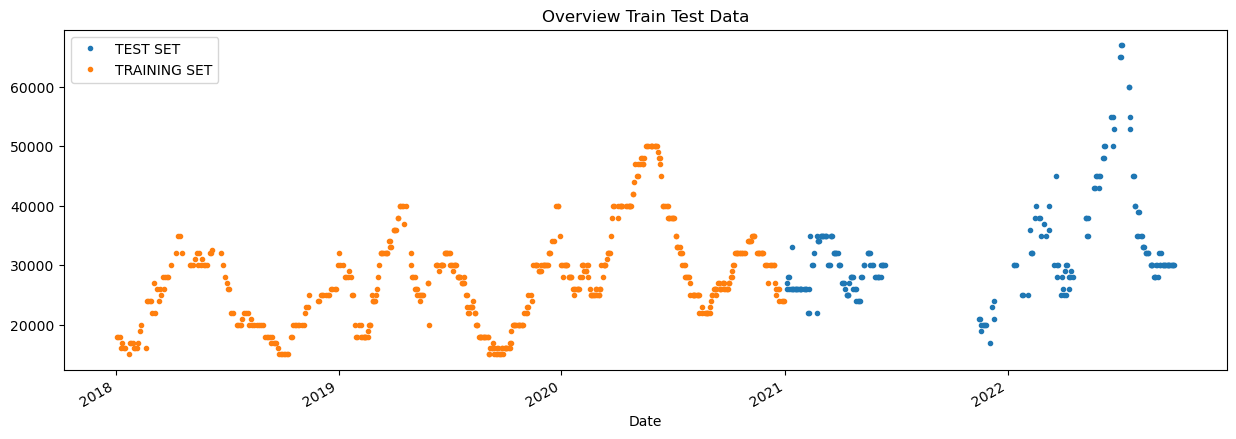

In [ ]:
split_plt = data_test \
            .rename(columns={'value' : 'TEST SET'}) \
            .join(data_train.rename(columns={'value' : 'TRAINING SET'}), how='outer') \
            .plot(figsize=(15,5), title='Overview Train Test Data', style='.')

In [ ]:
# time series features

data_train_copy = data_train.copy()
data_test_copy = data_test.copy()

X_train, y_train = create_features(data_train, target_variable='value')
X_test, y_test = create_features(data_test, target_variable='value')


C:\Users\dwian\AppData\Local\Temp\ipykernel_21408\3243050344.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train

dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear
Date                                                                          
2018-01-03          2        1      1  2018          3           3           1
2018-01-05          4        1      1  2018          5           5           1
2018-01-08          0        1      1  2018          8           8           2
2018-01-10          2        1      1  2018         10          10           2
2018-01-12          4        1      1  2018         12          12           2
2018-01-15          0        1      1  2018         15          15           3
2018-01-17          2        1      1  2018         17          17           3
2018-01-23          1        1      1  2018         23          23           4
2018-01-24          2        1      1  2018         24          24           4
2018-01-26          4        1      1  2018         26          26           4
2018-01-29          0        1      1  2018         29          29           5
2018-01-31          2        1      1  2018         31          31           5
2018-02-02          4        1      2  2018         33           2           5
2018-02-05          0        1      2  2018         36           5           6
2018-02-07          2        1      2  2018         38           7           6
2018-02-09          4        1      2  2018         40           9           6
2018-02-12          0        1      2  2018         43          12           7
2018-02-19          0        1      2  2018         50          19           8
2018-02-21          2        1      2  2018         52          21           8
2018-02-23          4        1      2  2018         54          23           8
2018-02-26          0        1      2  2018         57          26           9
2018-02-28          2        1      2  2018         59          28           9
2018-03-02          4        1      3  2018         61           2           9
2018-03-05          0        1      3  2018         64           5          10
2018-03-07          2        1      3  2018         66           7          10
2018-03-09          4        1      3  2018         68           9          10
2018-03-13          1        1      3  2018         72          13          11
2018-03-14          2        1      3  2018         73          14          11
2018-03-16          4        1      3  2018         75          16          11
2018-03-19          0        1      3  2018         78          19          12
2018-03-21          2        1      3  2018         80          21          12
2018-03-23          4        1      3  2018         82          23          12
2018-03-26          0        1      3  2018         85          26          13
2018-03-28          2        1      3  2018         87          28          13
2018-04-02          0        2      4  2018         92           2          14
2018-04-09          0        2      4  2018         99           9          15
2018-04-13          4        2      4  2018        103          13          15
2018-04-16          0        2      4  2018        106          16          16
2018-04-20          4        2      4  2018        110          20          16
2018-05-02          2        2      5  2018        122           2          18
2018-05-04          4        2      5  2018        124           4          18
2018-05-07          0        2      5  2018        127           7          19
2018-05-11          4        2      5  2018        131          11          19
2018-05-14          0        2      5  2018        134          14          20
2018-05-16          2        2      5  2018        136          16          20
2018-05-18          4        2      5  2018        138          18          20
2018-05-21          0        2      5  2018        141          21          21
2018-05-23          2        2      5  2018        143          23          21
2018-05-25          4        2      5  2018        145        

In [ ]:
y_train

Date
2018-01-03    18000.0
2018-01-05    18000.0
2018-01-08    18000.0
2018-01-10    16000.0
2018-01-12    17000.0
2018-01-15    16000.0
2018-01-17    16000.0
2018-01-23    15000.0
2018-01-24    17000.0
2018-01-26    17000.0
2018-01-29    17000.0
2018-01-31    16000.0
2018-02-02    16000.0
2018-02-05    16000.0
2018-02-07    17000.0
2018-02-09    19000.0
2018-02-12    20000.0
2018-02-19    16000.0
2018-02-21    24000.0
2018-02-23    24000.0
2018-02-26    24000.0
2018-02-28    24000.0
2018-03-02    22000.0
2018-03-05    27000.0
2018-03-07    22000.0
2018-03-09    26000.0
2018-03-13    24000.0
2018-03-14    26000.0
2018-03-16    25000.0
2018-03-19    28000.0
2018-03-21    26000.0
2018-03-23    28000.0
2018-03-26    28000.0
2018-03-28    28000.0
2018-04-02    30000.0
2018-04-09    32000.0
2018-04-13    35000.0
2018-04-16    35000.0
2018-04-20    32000.0
2018-05-02    30000.0
2018-05-04    30000.0
2018-05-07    30000.0
2018-05-11    31000.0
2018-05-14    32000.0
2018-05-16    30000.0
2018-

In [ ]:
X_test

dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear
Date                                                                          
2021-01-04          0        1      1  2021          4           4           1
2021-01-05          1        1      1  2021          5           5           1
2021-01-06          2        1      1  2021          6           6           1
2021-01-07          3        1      1  2021          7           7           1
2021-01-08          4        1      1  2021          8           8           1
2021-01-11          0        1      1  2021         11          11           2
2021-01-12          1        1      1  2021         12          12           2
2021-01-13          2        1      1  2021         13          13           2
2021-01-14          3        1      1  2021         14          14           2
2021-01-15          4        1      1  2021         15          15           2
2021-01-18          0        1      1  2021         18          18           3
2021-01-19          1        1      1  2021         19          19           3
2021-01-20          2        1      1  2021         20          20           3
2021-01-21          3        1      1  2021         21          21           3
2021-01-22          4        1      1  2021         22          22           3
2021-01-25          0        1      1  2021         25          25           4
2021-01-26          1        1      1  2021         26          26           4
2021-01-27          2        1      1  2021         27          27           4
2021-01-28          3        1      1  2021         28          28           4
2021-02-02          1        1      2  2021         33           2           5
2021-02-03          2        1      2  2021         34           3           5
2021-02-04          3        1      2  2021         35           4           5
2021-02-05          4        1      2  2021         36           5           5
2021-02-08          0        1      2  2021         39           8           6
2021-02-09          1        1      2  2021         40           9           6
2021-02-10          2        1      2  2021         41          10           6
2021-02-11          3        1      2  2021         42          11           6
2021-02-15          0        1      2  2021         46          15           7
2021-02-16          1        1      2  2021         47          16           7
2021-02-18          3        1      2  2021         49          18           7
2021-02-22          0        1      2  2021         53          22           8
2021-02-23          1        1      2  2021         54          23           8
2021-02-24          2        1      2  2021         55          24           8
2021-02-25          3        1      2  2021         56          25           8
2021-02-26          4        1      2  2021         57          26           8
2021-03-01          0        1      3  2021         60           1           9
2021-03-02          1        1      3  2021         61           2           9
2021-03-03          2        1      3  2021         62           3           9
2021-03-04          3        1      3  2021         63           4           9
2021-03-05          4        1      3  2021         64           5           9
2021-03-08          0        1      3  2021         67           8          10
2021-03-09          1        1      3  2021         68           9          10
2021-03-10          2        1      3  2021         69          10          10
2021-03-12          4        1      3  2021         71          12          10
2021-03-15          0        1      3  2021         74          15          11
2021-03-16          1        1      3  2021         75          16          11
2021-03-17          2        1      3  2021         76          17          11
2021-03-18          3        1      3  2021         77          18          11
2021-03-19          4        1      3  2021         78        

In [ ]:
y_test

Date
2021-01-04    26000.0
2021-01-05    27000.0
2021-01-06    28000.0
2021-01-07    28000.0
2021-01-08    26000.0
2021-01-11    26000.0
2021-01-12    26000.0
2021-01-13    33000.0
2021-01-14    26000.0
2021-01-15    26000.0
2021-01-18    26000.0
2021-01-19    26000.0
2021-01-20    26000.0
2021-01-21    26000.0
2021-01-22    26000.0
2021-01-25    26000.0
2021-01-26    26000.0
2021-01-27    26000.0
2021-01-28    26000.0
2021-02-02    26000.0
2021-02-03    26000.0
2021-02-04    26000.0
2021-02-05    26000.0
2021-02-08    22000.0
2021-02-09    22000.0
2021-02-10    26000.0
2021-02-11    35000.0
2021-02-15    30000.0
2021-02-16    30000.0
2021-02-18    32000.0
2021-02-22    22000.0
2021-02-23    35000.0
2021-02-24    34000.0
2021-02-25    34000.0
2021-02-26    34000.0
2021-03-01    35000.0
2021-03-02    35000.0
2021-03-03    35000.0
2021-03-04    35000.0
2021-03-05    35000.0
2021-03-08    35000.0
2021-03-09    35000.0
2021-03-10    35000.0
2021-03-12    30000.0
2021-03-15    30000.0
2021-

In [ ]:
from xgboost import XGBRegressor, plot_importance

# Model Fitting
xgb = XGBRegressor(objective= 'reg:linear', n_estimators=1000)

In [ ]:
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False) # Ubah ke True untuk training

[11:51:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\dwian\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

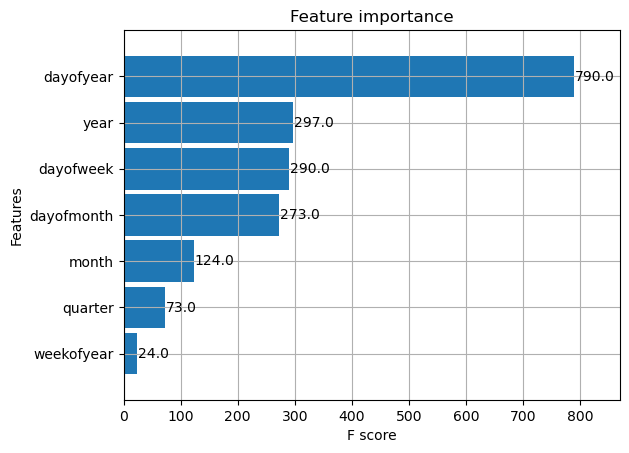

In [ ]:
feature_importance = plot_importance(xgb, height=0.9) #untuk melihat fitur yang paling mempengaruhi var independen yaitu day of year

In [ ]:
predicted_results = xgb.predict(X_test)
predicted_results

array([25287.668, 25287.668, 25287.668, 25287.668, 25287.668, 25287.668,
       25287.668, 25287.668, 25287.668, 24747.863, 23814.045, 23117.525,
       23117.525, 23117.525, 23117.525, 23117.525, 23117.525, 23117.525,
       23117.525, 24591.148, 24591.148, 24591.148, 24591.148, 24591.148,
       24591.148, 24591.148, 24591.148, 24051.344, 24051.344, 23117.525,
       23117.525, 23117.525, 23117.525, 23117.525, 23117.525, 24591.148,
       24591.148, 24591.148, 24591.148, 24591.148, 24591.148, 24591.148,
       24591.148, 25707.54 , 25167.734, 26862.125, 26862.125, 26862.125,
       26862.125, 26862.125, 31031.232, 31031.232, 34286.47 , 34286.47 ,
       34286.47 , 34286.47 , 34286.47 , 34286.47 , 35353.848, 35353.848,
       35353.848, 35353.848, 35353.848, 35353.848, 35353.848, 35353.848,
       35353.848, 35353.848, 35353.848, 35353.848, 35353.848, 35353.848,
       35353.848, 36314.785, 36314.785, 38763.582, 40165.195, 40165.195,
       40165.195, 41427.934, 41427.934, 41427.934, 

In [ ]:
timeseries_evaluation_metrics_func(y_test, predicted_results) #matriks evaluasi 

MSE is : 119062370.27336895
MAE is : 8876.698596903027
RMSE is : 10911.57047694643/785
MAPE is : 26.825089092817528
R2 is : -0.5773301594111124



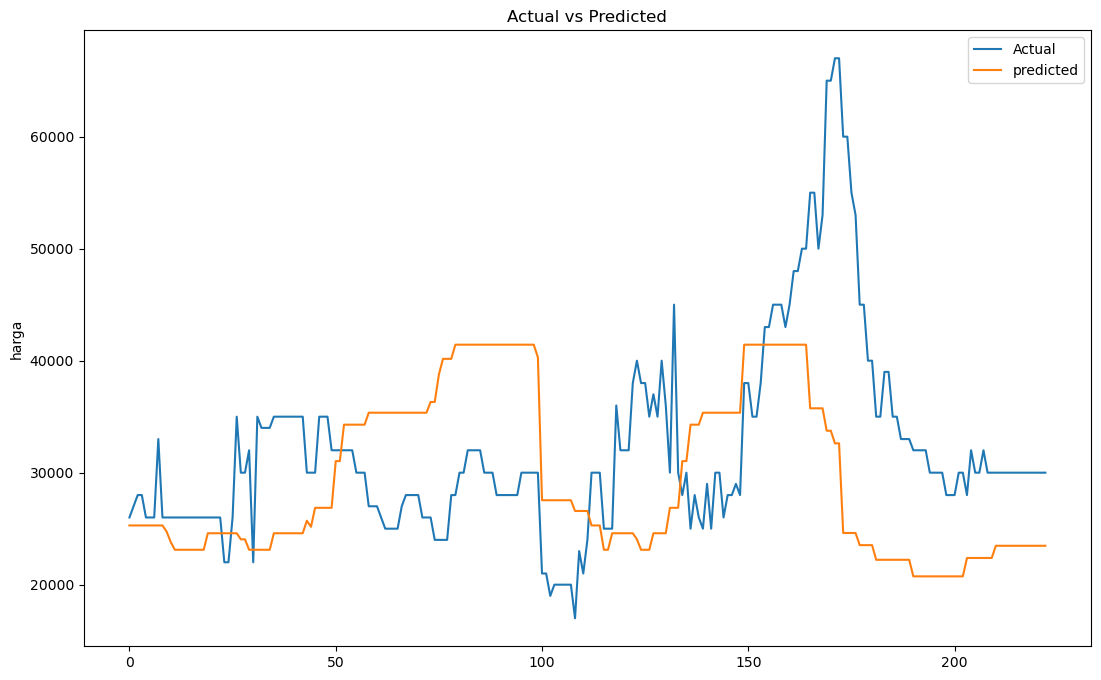

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13,8))
plt.plot(list(y_test))
plt.plot(list(predicted_results))
plt.title("Actual vs Predicted")
plt.ylabel("harga")
plt.legend(('Actual','predicted'))
plt.show()

# **Predict Future**

In [ ]:
train_all_df = pati.copy()
train_all_df

value
Date               
2018-01-03  18000.0
2018-01-05  18000.0
2018-01-08  18000.0
2018-01-10  16000.0
2018-01-12  17000.0
2018-01-15  16000.0
2018-01-17  16000.0
2018-01-23  15000.0
2018-01-24  17000.0
2018-01-26  17000.0
2018-01-29  17000.0
2018-01-31  16000.0
2018-02-02  16000.0
2018-02-05  16000.0
2018-02-07  17000.0
2018-02-09  19000.0
2018-02-12  20000.0
2018-02-19  16000.0
2018-02-21  24000.0
2018-02-23  24000.0
2018-02-26  24000.0
2018-02-28  24000.0
2018-03-02  22000.0
2018-03-05  27000.0
2018-03-07  22000.0
2018-03-09  26000.0
2018-03-13  24000.0
2018-03-14  26000.0
2018-03-16  25000.0
2018-03-19  28000.0
2018-03-21  26000.0
2018-03-23  28000.0
2018-03-26  28000.0
2018-03-28  28000.0
2018-04-02  30000.0
2018-04-09  32000.0
2018-04-13  35000.0
2018-04-16  35000.0
2018-04-20  32000.0
2018-05-02  30000.0
2018-05-04  30000.0
2018-05-07  30000.0
2018-05-11  31000.0
2018-05-14  32000.0
2018-05-16  30000.0
2018-05-18  32000.0
2018-05-21  30000.0
2018-05-23  31000.0
2018-05-25  30000.0
2018-05-28  30000.0
2018-05-30  30000.0
2018-06-04  32000.0
2018-06-06  32000.0
2018-06-08  32500.0
2018-06-22  32000.0
2018-06-25  30000.0
2018-06-29  28000.0
2018-07-02  27000.0
2018-07-04  26000.0
2018-07-06  26000.0
2018-07-09  22000.0
2018-07-12  22000.0
2018-07-19  20000.0
2018-07-20  20000.0
2018-07-23  20000.0
2018-07-25  20000.0
2018-07-27  21000.0
2018-07-30  22000.0
2018-08-03  22000.0
2018-08-06  22000.0
2018-08-08  20000.0
2018-08-10  21000.0
2018-08-13  20000.0
2018-08-15  20000.0
2018-08-20  20000.0
2018-08-24  20000.0
2018-08-27  20000.0
2018-08-31  20000.0
2018-09-03  18000.0
2018-09-05  18000.0
2018-09-07  18000.0
2018-09-10  18000.0
2018-09-12  17000.0
2018-09-14  18000.0
2018-09-17  17000.0
2018-09-19  17000.0
2018-09-21  17000.0
2018-09-24  16000.0
2018-09-26  15000.0
2018-09-28  15000.0
2018-10-01  15000.0
2018-10-03  15000.0
2018-10-05  15000.0
2018-10-08  15000.0
2018-10-10  15000.0
2018-10-15  18000.0
2018-10-17  18000.0
2018-10-19  20000.0
2018-10-22  20000.0
2018-10-24  20000.0
2018-10-26  20000.0
2018-10-29  20000.0
2018-11-02  20000.0
2018-11-05  20000.0
2018-11-07  22000.0
2018-11-09  23000.0
2018-11-12  23000.0
2018-11-14  25000.0
2018-11-28  24000.0
2018-11-30  24000.0
2018-12-03  25000.0
2018-12-05  25000.0
2018-12-07  25000.0
2018-12-12  25000.0
2018-12-14  25000.0
2018-12-17  25000.0
2018-12-19  26000.0
2018-12-21  26000.0
2018-12-26  26000.0
2018-12-28  26000.0
2018-12-31  30000.0
2019-01-02  32000.0
2019-01-04  30000.0
2019-01-09  30000.0
2019-01-11  28000.0
2019-01-14  28000.0
2019-01-16  28000.0
2019-01-18  29000.0
2019-01-21  28000.0
2019-01-23  25000.0
2019-01-25  25000.0
2019-01-28  20000.0
2019-01-30  18000.0
2019-02-01  18000.0
2019-02-04  20000.0
2019-02-06  18000.0
2019-02-07  20000.0
2019-02-08  18000.0
2019-02-11  18000.0
2019-02-12  18000.0
2019-02-13  18000.0
2019-02-14  18000.0
2019-02-15  18000.0
2019-02-18  18000.0
2019-02-19  19000.0
2019-02-20  20000.0
2019-02-21  20000.0
2019-02-22  20000.0
2019-02-25  25000.0
2019-02-26  24000.0
2019-02-27  24000.0
2019-02-28  24000.0
2019-03-01  24000.0
2019-03-04  25000.0
2019-03-05  26000.0
2019-03-06  28000.0
2019-03-08  30000.0
2019-03-11  32000.0
2019-03-12  32000.0
2019-03-13  32000.0
2019-03-14  32000.0
2019-03-18  32000.0
2019-03-20  32000.0
2019-03-21  32000.0
2019-03-22  32000.0
2019-03-25  34000.0
2019-03-26  34000.0
2019-03-27  33000.0
2019-03-28  33000.0
2019-04-01  36000.0
2019-04-02  36000.0
2019-04-04  36000.0
2019-04-05  36000.0
2019-04-08  38000.0
2019-04-09  38000.0
2019-04-11  40000.0
2019-04-12  40000.0
2019-04-15  40000.0
2019-04-16  40000.0
2019-04-18  37000.0
2019-04-22  40000.0
2019-04-29  32000.0
2019-04-30  30000.0
2019-05-02  28000.0
2019-05-03  28000.0
2019-05-06  26000.0
2019-05-07  28000.0
2019-05-08  26000.0
2019-05-09  26000.0
2019-05-10  25000.0
2019-05-13  25000.0
2019-05-14  24000.0
2019-05-15  25000.0
2019-05-16  25000.0
2019-05-17  25000.0
2019-05-20  25000.0
2019-05-27  27000.0
2019-05-28  27000.0
2019-05-29  20

In [ ]:
X_train_all, y_train_all = create_features(train_all_df, target_variable='value')

C:\Users\dwian\AppData\Local\Temp\ipykernel_21408\3243050344.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train_all

dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear
Date                                                                          
2018-01-03          2        1      1  2018          3           3           1
2018-01-05          4        1      1  2018          5           5           1
2018-01-08          0        1      1  2018          8           8           2
2018-01-10          2        1      1  2018         10          10           2
2018-01-12          4        1      1  2018         12          12           2
2018-01-15          0        1      1  2018         15          15           3
2018-01-17          2        1      1  2018         17          17           3
2018-01-23          1        1      1  2018         23          23           4
2018-01-24          2        1      1  2018         24          24           4
2018-01-26          4        1      1  2018         26          26           4
2018-01-29          0        1      1  2018         29          29           5
2018-01-31          2        1      1  2018         31          31           5
2018-02-02          4        1      2  2018         33           2           5
2018-02-05          0        1      2  2018         36           5           6
2018-02-07          2        1      2  2018         38           7           6
2018-02-09          4        1      2  2018         40           9           6
2018-02-12          0        1      2  2018         43          12           7
2018-02-19          0        1      2  2018         50          19           8
2018-02-21          2        1      2  2018         52          21           8
2018-02-23          4        1      2  2018         54          23           8
2018-02-26          0        1      2  2018         57          26           9
2018-02-28          2        1      2  2018         59          28           9
2018-03-02          4        1      3  2018         61           2           9
2018-03-05          0        1      3  2018         64           5          10
2018-03-07          2        1      3  2018         66           7          10
2018-03-09          4        1      3  2018         68           9          10
2018-03-13          1        1      3  2018         72          13          11
2018-03-14          2        1      3  2018         73          14          11
2018-03-16          4        1      3  2018         75          16          11
2018-03-19          0        1      3  2018         78          19          12
2018-03-21          2        1      3  2018         80          21          12
2018-03-23          4        1      3  2018         82          23          12
2018-03-26          0        1      3  2018         85          26          13
2018-03-28          2        1      3  2018         87          28          13
2018-04-02          0        2      4  2018         92           2          14
2018-04-09          0        2      4  2018         99           9          15
2018-04-13          4        2      4  2018        103          13          15
2018-04-16          0        2      4  2018        106          16          16
2018-04-20          4        2      4  2018        110          20          16
2018-05-02          2        2      5  2018        122           2          18
2018-05-04          4        2      5  2018        124           4          18
2018-05-07          0        2      5  2018        127           7          19
2018-05-11          4        2      5  2018        131          11          19
2018-05-14          0        2      5  2018        134          14          20
2018-05-16          2        2      5  2018        136          16          20
2018-05-18          4        2      5  2018        138          18          20
2018-05-21          0        2      5  2018        141          21          21
2018-05-23          2        2      5  2018        143          23          21
2018-05-25          4        2      5  2018        145        

In [ ]:
y_train_all

Date
2018-01-03    18000.0
2018-01-05    18000.0
2018-01-08    18000.0
2018-01-10    16000.0
2018-01-12    17000.0
2018-01-15    16000.0
2018-01-17    16000.0
2018-01-23    15000.0
2018-01-24    17000.0
2018-01-26    17000.0
2018-01-29    17000.0
2018-01-31    16000.0
2018-02-02    16000.0
2018-02-05    16000.0
2018-02-07    17000.0
2018-02-09    19000.0
2018-02-12    20000.0
2018-02-19    16000.0
2018-02-21    24000.0
2018-02-23    24000.0
2018-02-26    24000.0
2018-02-28    24000.0
2018-03-02    22000.0
2018-03-05    27000.0
2018-03-07    22000.0
2018-03-09    26000.0
2018-03-13    24000.0
2018-03-14    26000.0
2018-03-16    25000.0
2018-03-19    28000.0
2018-03-21    26000.0
2018-03-23    28000.0
2018-03-26    28000.0
2018-03-28    28000.0
2018-04-02    30000.0
2018-04-09    32000.0
2018-04-13    35000.0
2018-04-16    35000.0
2018-04-20    32000.0
2018-05-02    30000.0
2018-05-04    30000.0
2018-05-07    30000.0
2018-05-11    31000.0
2018-05-14    32000.0
2018-05-16    30000.0
2018-

In [ ]:
# Model Fitting
xgb = XGBRegressor(objective= 'reg:linear', n_estimators=1000)

xgb.fit(X_train_all, y_train_all,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False) # Ubah ke True untuk training

C:\Users\dwian\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:41:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
future = pd.date_range('2022-09-30','2023-09-30')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
train_all_df['isFuture'] = False
pati_and_future = pd.concat([train_all_df, future_df])
pati_and_future

value       date  dayofweek  quarter  month    year  dayofyear  \
2018-01-03  18000.0 2018-01-03        2.0      1.0    1.0  2018.0        3.0   
2018-01-05  18000.0 2018-01-05        4.0      1.0    1.0  2018.0        5.0   
2018-01-08  18000.0 2018-01-08        0.0      1.0    1.0  2018.0        8.0   
2018-01-10  16000.0 2018-01-10        2.0      1.0    1.0  2018.0       10.0   
2018-01-12  17000.0 2018-01-12        4.0      1.0    1.0  2018.0       12.0   
2018-01-15  16000.0 2018-01-15        0.0      1.0    1.0  2018.0       15.0   
2018-01-17  16000.0 2018-01-17        2.0      1.0    1.0  2018.0       17.0   
2018-01-23  15000.0 2018-01-23        1.0      1.0    1.0  2018.0       23.0   
2018-01-24  17000.0 2018-01-24        2.0      1.0    1.0  2018.0       24.0   
2018-01-26  17000.0 2018-01-26        4.0      1.0    1.0  2018.0       26.0   
2018-01-29  17000.0 2018-01-29        0.0      1.0    1.0  2018.0       29.0   
2018-01-31  16000.0 2018-01-31        2.0      1.0    1.0  2018.0       31.0   
2018-02-02  16000.0 2018-02-02        4.0      1.0    2.0  2018.0       33.0   
2018-02-05  16000.0 2018-02-05        0.0      1.0    2.0  2018.0       36.0   
2018-02-07  17000.0 2018-02-07        2.0      1.0    2.0  2018.0       38.0   
2018-02-09  19000.0 2018-02-09        4.0      1.0    2.0  2018.0       40.0   
2018-02-12  20000.0 2018-02-12        0.0      1.0    2.0  2018.0       43.0   
2018-02-19  16000.0 2018-02-19        0.0      1.0    2.0  2018.0       50.0   
2018-02-21  24000.0 2018-02-21        2.0      1.0    2.0  2018.0       52.0   
2018-02-23  24000.0 2018-02-23        4.0      1.0    2.0  2018.0       54.0   
2018-02-26  24000.0 2018-02-26        0.0      1.0    2.0  2018.0       57.0   
2018-02-28  24000.0 2018-02-28        2.0      1.0    2.0  2018.0       59.0   
2018-03-02  22000.0 2018-03-02        4.0      1.0    3.0  2018.0       61.0   
2018-03-05  27000.0 2018-03-05        0.0      1.0    3.0  2018.0       64.0   
2018-03-07  22000.0 2018-03-07        2.0      1.0    3.0  2018.0       66.0   
2018-03-09  26000.0 2018-03-09        4.0      1.0    3.0  2018.0       68.0   
2018-03-13  24000.0 2018-03-13        1.0      1.0    3.0  2018.0       72.0   
2018-03-14  26000.0 2018-03-14        2.0      1.0    3.0  2018.0       73.0   
2018-03-16  25000.0 2018-03-16        4.0      1.0    3.0  2018.0       75.0   
2018-03-19  28000.0 2018-03-19        0.0      1.0    3.0  2018.0       78.0   
2018-03-21  26000.0 2018-03-21        2.0      1.0    3.0  2018.0       80.0   
2018-03-23  28000.0 2018-03-23        4.0      1.0    3.0  2018.0       82.0   
2018-03-26  28000.0 2018-03-26        0.0      1.0    3.0  2018.0       85.0   
2018-03-28  28000.0 2018-03-28        2.0      1.0    3.0  2018.0       87.0   
2018-04-02  30000.0 2018-04-02        0.0      2.0    4.0  2018.0       92.0   
2018-04-09  32000.0 2018-04-09        0.0      2.0    4.0  2018.0       99.0   
2018-04-13  35000.0 2018-04-13        4.0      2.0    4.0  2018.0      103.0   
2018-04-16  35000.0 2018-04-16        0.0      2.0    4.0  2018.0      106.0   
2018-04-20  32000.0 2018-04-20        4.0      2.0    4.0  2018.0      110.0   
2018-05-02  30000.0 2018-05-02        2.0      2.0    5.0  2018.0      122.0   
2018-05-04  30000.0 2018-05-04        4.0      2.0    5.0  2018.0      124.0   
2018-05-07  30000.0 2018-05-07        0.0      2.0    5.0  2018.0      127.0   
2018-05-11  31000.0 2018-05-11        4.0      2.0    5.0  2018.0      131.0   
2018-05-14  32000.0 2018-05-14        0.0      2.0    5.0  2018.0      134.0   
2018-05-16  30000.0 2018-05-16        2.0      2.0    5.0  2018.0      136.0   
2018-05-18  32000.0 2018-05-18        4.0      2.0    5.0  2018.0      138.0   
2018-05-21  30000.0 2018-05-21        0.0      2.0    5.0  2018.0      141.0   
2018-05-23  31000.0 2018-05-23        2.0      2.0    5.0  2018.0      143.0   
2018-05-25  30000.0 2018-05-25        4.0      2.0    5.0  2018.0      145.0   
2018-05-28  30

In [ ]:
future_df_pred = pati_and_future.query('isFuture').copy()
future_df_pred = future_df_pred.drop(columns='isFuture')
future_df_pred

value date  dayofweek  quarter  month  year  dayofyear  \
2022-09-30    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-01    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-02    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-03    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-04    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-05    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-06    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-07    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-08    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-09    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-10    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-11    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-12    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-13    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-14    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-15    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-16    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-17    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-18    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-19    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-20    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-21    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-22    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-23    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-24    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-25    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-26    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-27    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-28    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-29    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-30    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-10-31    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-01    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-02    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-03    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-04    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-05    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-06    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-07    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-08    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-09    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-10    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-11    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-12    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-13    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-14    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-15    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-16    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-17    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-18    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-19    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-20    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-21    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-22    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-23    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-24    NaN  NaT        NaN      NaN    NaN   NaN        NaN   
2022-11-25    NaN  NaT

In [ ]:
X_test_all, y_test_all = create_features(future_df_pred, 'value')
X_test_all

C:\Users\dwian\AppData\Local\Temp\ipykernel_21408\3243050344.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


dayofweek  quarter  month  year  dayofyear  dayofmonth  weekofyear
2022-09-30          4        3      9  2022        273          30          39
2022-10-01          5        4     10  2022        274           1          39
2022-10-02          6        4     10  2022        275           2          39
2022-10-03          0        4     10  2022        276           3          40
2022-10-04          1        4     10  2022        277           4          40
2022-10-05          2        4     10  2022        278           5          40
2022-10-06          3        4     10  2022        279           6          40
2022-10-07          4        4     10  2022        280           7          40
2022-10-08          5        4     10  2022        281           8          40
2022-10-09          6        4     10  2022        282           9          40
2022-10-10          0        4     10  2022        283          10          41
2022-10-11          1        4     10  2022        284          11          41
2022-10-12          2        4     10  2022        285          12          41
2022-10-13          3        4     10  2022        286          13          41
2022-10-14          4        4     10  2022        287          14          41
2022-10-15          5        4     10  2022        288          15          41
2022-10-16          6        4     10  2022        289          16          41
2022-10-17          0        4     10  2022        290          17          42
2022-10-18          1        4     10  2022        291          18          42
2022-10-19          2        4     10  2022        292          19          42
2022-10-20          3        4     10  2022        293          20          42
2022-10-21          4        4     10  2022        294          21          42
2022-10-22          5        4     10  2022        295          22          42
2022-10-23          6        4     10  2022        296          23          42
2022-10-24          0        4     10  2022        297          24          43
2022-10-25          1        4     10  2022        298          25          43
2022-10-26          2        4     10  2022        299          26          43
2022-10-27          3        4     10  2022        300          27          43
2022-10-28          4        4     10  2022        301          28          43
2022-10-29          5        4     10  2022        302          29          43
2022-10-30          6        4     10  2022        303          30          43
2022-10-31          0        4     10  2022        304          31          44
2022-11-01          1        4     11  2022        305           1          44
2022-11-02          2        4     11  2022        306           2          44
2022-11-03          3        4     11  2022        307           3          44
2022-11-04          4        4     11  2022        308           4          44
2022-11-05          5        4     11  2022        309           5          44
2022-11-06          6        4     11  2022        310           6          44
2022-11-07          0        4     11  2022        311           7          45
2022-11-08          1        4     11  2022        312           8          45
2022-11-09          2        4     11  2022        313           9          45
2022-11-10          3        4     11  2022        314          10          45
2022-11-11          4        4     11  2022        315          11          45
2022-11-12          5        4     11  2022        316          12          45
2022-11-13          6        4     11  2022        317          13          45
2022-11-14          0        4     11  2022        318          14          46
2022-11-15          1        4     11  2022        319          15          46
2022-11-16          2        4     11  2022        320          16          46
2022-11-17          3        4     11  2022        321          17          46
2022-11-18          4        4     11  2022        322        

In [ ]:
y_test_all

2022-09-30   NaN
2022-10-01   NaN
2022-10-02   NaN
2022-10-03   NaN
2022-10-04   NaN
2022-10-05   NaN
2022-10-06   NaN
2022-10-07   NaN
2022-10-08   NaN
2022-10-09   NaN
2022-10-10   NaN
2022-10-11   NaN
2022-10-12   NaN
2022-10-13   NaN
2022-10-14   NaN
2022-10-15   NaN
2022-10-16   NaN
2022-10-17   NaN
2022-10-18   NaN
2022-10-19   NaN
2022-10-20   NaN
2022-10-21   NaN
2022-10-22   NaN
2022-10-23   NaN
2022-10-24   NaN
2022-10-25   NaN
2022-10-26   NaN
2022-10-27   NaN
2022-10-28   NaN
2022-10-29   NaN
2022-10-30   NaN
2022-10-31   NaN
2022-11-01   NaN
2022-11-02   NaN
2022-11-03   NaN
2022-11-04   NaN
2022-11-05   NaN
2022-11-06   NaN
2022-11-07   NaN
2022-11-08   NaN
2022-11-09   NaN
2022-11-10   NaN
2022-11-11   NaN
2022-11-12   NaN
2022-11-13   NaN
2022-11-14   NaN
2022-11-15   NaN
2022-11-16   NaN
2022-11-17   NaN
2022-11-18   NaN
2022-11-19   NaN
2022-11-20   NaN
2022-11-21   NaN
2022-11-22   NaN
2022-11-23   NaN
2022-11-24   NaN
2022-11-25   NaN
2022-11-26   NaN
2022-11-27   N

In [ ]:
X_test_all['Harga'] = xgb.predict(X_test_all)

C:\Users\dwian\AppData\Local\Temp\ipykernel_21408\2006382058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_all['Harga'] = xgb.predict(X_test_all)


In [ ]:
X_test_all

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
2022-09-30          4        3      9  2022        273          30   
2022-10-01          5        4     10  2022        274           1   
2022-10-02          6        4     10  2022        275           2   
2022-10-03          0        4     10  2022        276           3   
2022-10-04          1        4     10  2022        277           4   
2022-10-05          2        4     10  2022        278           5   
2022-10-06          3        4     10  2022        279           6   
2022-10-07          4        4     10  2022        280           7   
2022-10-08          5        4     10  2022        281           8   
2022-10-09          6        4     10  2022        282           9   
2022-10-10          0        4     10  2022        283          10   
2022-10-11          1        4     10  2022        284          11   
2022-10-12          2        4     10  2022        285          12   
2022-10-13          3        4     10  2022        286          13   
2022-10-14          4        4     10  2022        287          14   
2022-10-15          5        4     10  2022        288          15   
2022-10-16          6        4     10  2022        289          16   
2022-10-17          0        4     10  2022        290          17   
2022-10-18          1        4     10  2022        291          18   
2022-10-19          2        4     10  2022        292          19   
2022-10-20          3        4     10  2022        293          20   
2022-10-21          4        4     10  2022        294          21   
2022-10-22          5        4     10  2022        295          22   
2022-10-23          6        4     10  2022        296          23   
2022-10-24          0        4     10  2022        297          24   
2022-10-25          1        4     10  2022        298          25   
2022-10-26          2        4     10  2022        299          26   
2022-10-27          3        4     10  2022        300          27   
2022-10-28          4        4     10  2022        301          28   
2022-10-29          5        4     10  2022        302          29   
2022-10-30          6        4     10  2022        303          30   
2022-10-31          0        4     10  2022        304          31   
2022-11-01          1        4     11  2022        305           1   
2022-11-02          2        4     11  2022        306           2   
2022-11-03          3        4     11  2022        307           3   
2022-11-04          4        4     11  2022        308           4   
2022-11-05          5        4     11  2022        309           5   
2022-11-06          6        4     11  2022        310           6   
2022-11-07          0        4     11  2022        311           7   
2022-11-08          1        4     11  2022        312           8   
2022-11-09          2        4     11  2022        313           9   
2022-11-10          3        4     11  2022        314          10   
2022-11-11          4        4     11  2022        315          11   
2022-11-12          5        4     11  2022        316          12   
2022-11-13          6        4     11  2022        317          13   
2022-11-14          0        4     11  2022        318          14   
2022-11-15          1        4     11  2022        319          15   
2022-11-16          2        4     11  2022        320          16   
2022-11-17          3        4     11  2022        321          17   
2022-11-18          4        4     11  2022        322          18   
2022-11-19          5        4     11  2022        323          19   
2022-11-20          6        4     11  2022        324          20   
2022-11-21          0        4     11  2022        325          21   
2022-11-22          1        4     11  2022        326          22   
2022-11-23          2        4     11  2022        327          23   
2022-11-24          3        4     11  2022        328          24   
2022-11-25          4 

# **X**

In [ ]:
x_pati = Pati_clean.copy()
x_pati

Kabupaten       Date  value
1     Kabupaten Pati 2018-01-03  18000
3     Kabupaten Pati 2018-01-05  18000
4     Kabupaten Pati 2018-01-08  18000
6     Kabupaten Pati 2018-01-10  16000
8     Kabupaten Pati 2018-01-12  17000
9     Kabupaten Pati 2018-01-15  16000
11    Kabupaten Pati 2018-01-17  16000
15    Kabupaten Pati 2018-01-23  15000
16    Kabupaten Pati 2018-01-24  17000
18    Kabupaten Pati 2018-01-26  17000
19    Kabupaten Pati 2018-01-29  17000
21    Kabupaten Pati 2018-01-31  16000
23    Kabupaten Pati 2018-02-02  16000
24    Kabupaten Pati 2018-02-05  16000
26    Kabupaten Pati 2018-02-07  17000
28    Kabupaten Pati 2018-02-09  19000
29    Kabupaten Pati 2018-02-12  20000
33    Kabupaten Pati 2018-02-19  16000
35    Kabupaten Pati 2018-02-21  24000
37    Kabupaten Pati 2018-02-23  24000
38    Kabupaten Pati 2018-02-26  24000
40    Kabupaten Pati 2018-02-28  24000
42    Kabupaten Pati 2018-03-02  22000
43    Kabupaten Pati 2018-03-05  27000
45    Kabupaten Pati 2018-03-07  22000
47    Kabupaten Pati 2018-03-09  26000
49    Kabupaten Pati 2018-03-13  24000
50    Kabupaten Pati 2018-03-14  26000
52    Kabupaten Pati 2018-03-16  25000
53    Kabupaten Pati 2018-03-19  28000
55    Kabupaten Pati 2018-03-21  26000
57    Kabupaten Pati 2018-03-23  28000
58    Kabupaten Pati 2018-03-26  28000
60    Kabupaten Pati 2018-03-28  28000
62    Kabupaten Pati 2018-04-02  30000
67    Kabupaten Pati 2018-04-09  32000
71    Kabupaten Pati 2018-04-13  35000
72    Kabupaten Pati 2018-04-16  35000
76    Kabupaten Pati 2018-04-20  32000
83    Kabupaten Pati 2018-05-02  30000
85    Kabupaten Pati 2018-05-04  30000
86    Kabupaten Pati 2018-05-07  30000
89    Kabupaten Pati 2018-05-11  31000
90    Kabupaten Pati 2018-05-14  32000
92    Kabupaten Pati 2018-05-16  30000
94    Kabupaten Pati 2018-05-18  32000
95    Kabupaten Pati 2018-05-21  30000
97    Kabupaten Pati 2018-05-23  31000
99    Kabupaten Pati 2018-05-25  30000
100   Kabupaten Pati 2018-05-28  30000
101   Kabupaten Pati 2018-05-30  30000
103   Kabupaten Pati 2018-06-04  32000
105   Kabupaten Pati 2018-06-06  32000
107   Kabupaten Pati 2018-06-08  32500
109   Kabupaten Pati 2018-06-22  32000
110   Kabupaten Pati 2018-06-25  30000
113   Kabupaten Pati 2018-06-29  28000
114   Kabupaten Pati 2018-07-02  27000
116   Kabupaten Pati 2018-07-04  26000
118   Kabupaten Pati 2018-07-06  26000
119   Kabupaten Pati 2018-07-09  22000
122   Kabupaten Pati 2018-07-12  22000
127   Kabupaten Pati 2018-07-19  20000
128   Kabupaten Pati 2018-07-20  20000
129   Kabupaten Pati 2018-07-23  20000
131   Kabupaten Pati 2018-07-25  20000
133   Kabupaten Pati 2018-07-27  21000
134   Kabupaten Pati 2018-07-30  22000
138   Kabupaten Pati 2018-08-03  22000
139   Kabupaten Pati 2018-08-06  22000
141   Kabupaten Pati 2018-08-08  20000
143   Kabupaten Pati 2018-08-10  21000
144   Kabupaten Pati 2018-08-13  20000
146   Kabupaten Pati 2018-08-15  20000
148   Kabupaten Pati 2018-08-20  20000
151   Kabupaten Pati 2018-08-24  20000
152   Kabupaten Pati 2018-08-27  20000
156   Kabupaten Pati 2018-08-31  20000
157   Kabupaten Pati 2018-09-03  18000
159   Kabupaten Pati 2018-09-05  18000
161   Kabupaten Pati 2018-09-07  18000
162   Kabupaten Pati 2018-09-10  18000
163   Kabupaten Pati 2018-09-12  17000
165   Kabupaten Pati 2018-09-14  18000
166   Kabupaten Pati 2018-09-17  17000
168   Kabupaten Pati 2018-09-19  17000
170   Kabupaten Pati 2018-09-21  17000
171   Kabupaten Pati 2018-09-24  16000
173   Kabupaten Pati 2018-09-26  15000
175   Kabupaten Pati 2018-09-28  15000
176   Kabupaten Pati 2018-10-01  15000
178   Kabupaten Pati 2018-10-03  15000
180   Kabupaten Pati 2018-10-05  15000
181   Kabupaten Pati 2018-10-08  15000
183   Kabupaten Pati 2018-10-10  15000
186   Kabupaten Pati 2018-10-15  18000
188   Kabupaten Pati 2018-10-17  18000
190   Kabupaten Pati 2018-10-19  20000
191   Kabupaten Pati 2018-10-22  20000
193   Kabupaten Pati 2018-10-24  20000
195   Kabupaten Pati 2018-10-26  20000
196   Kabupaten Pati 2018-10-29  

In [ ]:
x_pati['month'] = x_pati['Date'].dt.month

In [ ]:
x_pati

Kabupaten       Date  value  month
1     Kabupaten Pati 2018-01-03  18000      1
3     Kabupaten Pati 2018-01-05  18000      1
4     Kabupaten Pati 2018-01-08  18000      1
6     Kabupaten Pati 2018-01-10  16000      1
8     Kabupaten Pati 2018-01-12  17000      1
9     Kabupaten Pati 2018-01-15  16000      1
11    Kabupaten Pati 2018-01-17  16000      1
15    Kabupaten Pati 2018-01-23  15000      1
16    Kabupaten Pati 2018-01-24  17000      1
18    Kabupaten Pati 2018-01-26  17000      1
19    Kabupaten Pati 2018-01-29  17000      1
21    Kabupaten Pati 2018-01-31  16000      1
23    Kabupaten Pati 2018-02-02  16000      2
24    Kabupaten Pati 2018-02-05  16000      2
26    Kabupaten Pati 2018-02-07  17000      2
28    Kabupaten Pati 2018-02-09  19000      2
29    Kabupaten Pati 2018-02-12  20000      2
33    Kabupaten Pati 2018-02-19  16000      2
35    Kabupaten Pati 2018-02-21  24000      2
37    Kabupaten Pati 2018-02-23  24000      2
38    Kabupaten Pati 2018-02-26  24000      2
40    Kabupaten Pati 2018-02-28  24000      2
42    Kabupaten Pati 2018-03-02  22000      3
43    Kabupaten Pati 2018-03-05  27000      3
45    Kabupaten Pati 2018-03-07  22000      3
47    Kabupaten Pati 2018-03-09  26000      3
49    Kabupaten Pati 2018-03-13  24000      3
50    Kabupaten Pati 2018-03-14  26000      3
52    Kabupaten Pati 2018-03-16  25000      3
53    Kabupaten Pati 2018-03-19  28000      3
55    Kabupaten Pati 2018-03-21  26000      3
57    Kabupaten Pati 2018-03-23  28000      3
58    Kabupaten Pati 2018-03-26  28000      3
60    Kabupaten Pati 2018-03-28  28000      3
62    Kabupaten Pati 2018-04-02  30000      4
67    Kabupaten Pati 2018-04-09  32000      4
71    Kabupaten Pati 2018-04-13  35000      4
72    Kabupaten Pati 2018-04-16  35000      4
76    Kabupaten Pati 2018-04-20  32000      4
83    Kabupaten Pati 2018-05-02  30000      5
85    Kabupaten Pati 2018-05-04  30000      5
86    Kabupaten Pati 2018-05-07  30000      5
89    Kabupaten Pati 2018-05-11  31000      5
90    Kabupaten Pati 2018-05-14  32000      5
92    Kabupaten Pati 2018-05-16  30000      5
94    Kabupaten Pati 2018-05-18  32000      5
95    Kabupaten Pati 2018-05-21  30000      5
97    Kabupaten Pati 2018-05-23  31000      5
99    Kabupaten Pati 2018-05-25  30000      5
100   Kabupaten Pati 2018-05-28  30000      5
101   Kabupaten Pati 2018-05-30  30000      5
103   Kabupaten Pati 2018-06-04  32000      6
105   Kabupaten Pati 2018-06-06  32000      6
107   Kabupaten Pati 2018-06-08  32500      6
109   Kabupaten Pati 2018-06-22  32000      6
110   Kabupaten Pati 2018-06-25  30000      6
113   Kabupaten Pati 2018-06-29  28000      6
114   Kabupaten Pati 2018-07-02  27000      7
116   Kabupaten Pati 2018-07-04  26000      7
118   Kabupaten Pati 2018-07-06  26000      7
119   Kabupaten Pati 2018-07-09  22000      7
122   Kabupaten Pati 2018-07-12  22000      7
127   Kabupaten Pati 2018-07-19  20000      7
128   Kabupaten Pati 2018-07-20  20000      7
129   Kabupaten Pati 2018-07-23  20000      7
131   Kabupaten Pati 2018-07-25  20000      7
133   Kabupaten Pati 2018-07-27  21000      7
134   Kabupaten Pati 2018-07-30  22000      7
138   Kabupaten Pati 2018-08-03  22000      8
139   Kabupaten Pati 2018-08-06  22000      8
141   Kabupaten Pati 2018-08-08  20000      8
143   Kabupaten Pati 2018-08-10  21000      8
144   Kabupaten Pati 2018-08-13  20000      8
146   Kabupaten Pati 2018-08-15  20000      8
148   Kabupaten Pati 2018-08-20  20000      8
151   Kabupaten Pati 2018-08-24  20000      8
152   Kabupaten Pati 2018-08-27  20000      8
156   Kabupaten Pati 2018-08-31  20000      8
157   Kabupaten Pati 2018-09-03  18000      9
159   Kabupaten Pati 2018-09-05  18000      9
161   Kabupaten Pati 2018-09-07  18000      9
162   Kabupaten Pati 2018-09-10  18000      9
163   Kabupaten Pati 2018-09-12  17000      9
165   Kabupaten Pati 2018-09-14  18000      9
166   Kabupaten Pati 2018-09-17  17000      9
168   Kabupaten Pati 2018-09-19  17000      9
170   Kab

In [ ]:
x_pati = x_pati.set_index('month')
x_pati = x_pati.drop(columns=['Kabupaten', 'Date'], axis=1)

In [ ]:
x_pati

value
month       
1      18000
1      18000
1      18000
1      16000
1      17000
1      16000
1      16000
1      15000
1      17000
1      17000
1      17000
1      16000
2      16000
2      16000
2      17000
2      19000
2      20000
2      16000
2      24000
2      24000
2      24000
2      24000
3      22000
3      27000
3      22000
3      26000
3      24000
3      26000
3      25000
3      28000
3      26000
3      28000
3      28000
3      28000
4      30000
4      32000
4      35000
4      35000
4      32000
5      30000
5      30000
5      30000
5      31000
5      32000
5      30000
5      32000
5      30000
5      31000
5      30000
5      30000
5      30000
6      32000
6      32000
6      32500
6      32000
6      30000
6      28000
7      27000
7      26000
7      26000
7      22000
7      22000
7      20000
7      20000
7      20000
7      20000
7      21000
7      22000
8      22000
8      22000
8      20000
8      21000
8      20000
8      20000
8      20000
8      20000
8      20000
8      20000
9      18000
9      18000
9      18000
9      18000
9      17000
9      18000
9      17000
9      17000
9      17000
9      16000
9      15000
9      15000
10     15000
10     15000
10     15000
10     15000
10     15000
10     18000
10     18000
10     20000
10     20000
10     20000
10     20000
10     20000
11     20000
11     20000
11     22000
11     23000
11     23000
11     25000
11     24000
11     24000
12     25000
12     25000
12     25000
12     25000
12     25000
12     25000
12     26000
12     26000
12     26000
12     26000
12     30000
1      32000
1      30000
1      30000
1      28000
1      28000
1      28000
1      29000
1      28000
1      25000
1      25000
1      20000
1      18000
2      18000
2      20000
2      18000
2      20000
2      18000
2      18000
2      18000
2      18000
2      18000
2      18000
2      18000
2      19000
2      20000
2      20000
2      20000
2      25000
2      24000
2      24000
2      24000
3      24000
3      25000
3      26000
3      28000
3      30000
3      32000
3      32000
3      32000
3      32000
3      32000
3      32000
3      32000
3      32000
3      34000
3      34000
3      33000
3      33000
4      36000
4      36000
4      36000
4      36000
4      38000
4      38000
4      40000
4      40000
4      40000
4      40000
4      37000
4      40000
4      32000
4      30000
5      28000
5      28000
5      26000
5      28000
5      26000
5      26000
5      25000
5      25000
5      24000
5      25000
5      25000
5      25000
5      25000
5      27000
5      27000
5      20000
6      30000
6      30000
6      30000
6      29000
6      30000
6      30000
6      30000
6      30000
6      30000
6      32000
6      32000
6      32000
6      32000
6      32000
7      32000
7      32000
7      30000
7      30000
7      30000
7      29000
7      30000
7      30000
7      30000
7      30000
7      28000
7      28000
7      28000
7      28000
7      28000
7      27000
7      27000
7      27000
7      27000
7      28000
7      25000
7      25000
7      23000
8      22000
8      22000
8      23000
8      23000
8      23000
8      23000
8      24000
8      22000
8      22000
8      20000
8      20000
8      20000
8      18000
8      18000
8      18000
8      18000
8      18000
8      18000
8      18000
8      18000
8      18000
8      18000
9      18000
9      18000
9      15000
9      15000
9      16000
9      16000
9      16000
9      17000
9      16000
9      15000
9      15000
9      15000
9      16000
9      16000
9      15000
9      15000
9      15000
9      16000
9      16000
9      15000
9      16000
10     16000
10     16000
10     16000
10     16000
10     16000
10     16000
10     17000
10     17000
10     19000
10     20000
10     20000
10     20000
10     20000
10     20000
10     20000
10     20000
10     20000
10     20000
10     20000
10     20000
10     20000
10     22000
11     22000
11     22000
11     23000
11     23000
11     25000
11 

In [ ]:
split_plt = data_test \
            .rename(columns={'value' : 'TEST SET'}) \
            .join(data_train.rename(columns={'value' : 'TRAINING SET'}), how='outer') \
            .plot(figsize=(15,5), title='Overview Train Test Data', style='.')

ValueError: columns overlap but no suffix specified: Index(['date', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')